In [ ]:
#@title 1번: Monte Carlo를 이용한 적분 클래스의 MC 함수와 show_err 함수 완성하기
import numpy as np
import matplotlib.pyplot as plt

class MC_int:
    def __init__(self, func, steps_per_MC=10000, a=0, b=1, seed=1):
        np.random.seed(seed)
        self.func = func
        self.steps_ = steps_per_MC
        self.a = a
        self.b = b
        self.width = b-a
        self.height = self.func(b)-self.func(a)
        self.values = []
        self.Nmc = 0
        self.area = self.width * self.height

    def MC(self, N):
        for _ in range(N):
            count = 0
            for _ in range(self.steps_):
                # 몬테카를로 스텝 한 번당 self.steps_ 번 순서쌍을 생성:x값과 y값을 사각형 내에서 무작위로 생성
                x = np.random.uniform(self.a, self.b)
                y = np.random.uniform(self.func(self.a), self.func(self.b))
                # y 값이 func(x) 보다 작은 경우의 비율 * 사각형 면적으로 적분값을 추정
                if y < self.func(x):
                    count += 1
            estimate = (count / self.steps_) * self.area
            # 아래 코드가 적분값 추정치를 self.values에 저장하게끔 코드 작성
            # 각 몬테카를로 스텝마다 추정치를 self.values에 추가
            self.values.append(estimate)
            # 각 몬테카를로 스텝마다 self.Nmc += 1 (self.Nmc는 총 몬테카를로 스텝 수행수를 저장)
            self.Nmc += 1

    def show(self):
        # 추정적분값 그래프 그리기 (x축은 Monte Carlo steps, y축은 추정 적분값)
        fig = plt.figure()
        ax = fig.add_subplot()
        result = [np.average(self.values[:i]) for i in range(1, self.Nmc+1)]
        ax.plot(range(self.Nmc), result)
        ax.set_xlabel('MC steps')
        ax.set_ylabel('Estimated value')
        ax.set_title('231122')
        plt.show()

    def show_err(self, exact=0, start=0):
        # 위의 show 함수를 참고해서 키워드 인자로 주어진 정확한 값과 몬테카를로 추정치의 차 그래프로 그리기
        fig = plt.figure()
        ax = fig.add_subplot()
        result = [np.abs(np.average(self.values[:i]) - exact) for i in range(start, self.Nmc)]
        ax.plot(range(start, self.Nmc), result)
        ax.set_xlabel('MC steps')
        ax.set_ylabel('Error')
        ax.set_title('231122')
        plt.show()

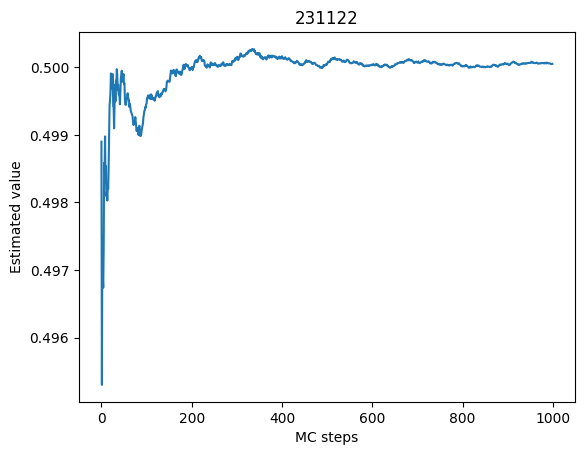

In [ ]:
def func(x):
  return x

my = MC_int(func)
my.MC(1000)
my.show()

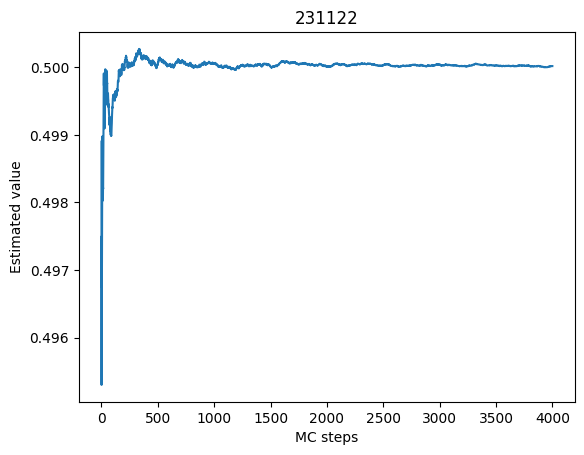

In [ ]:
my.MC(3000)
my.show()

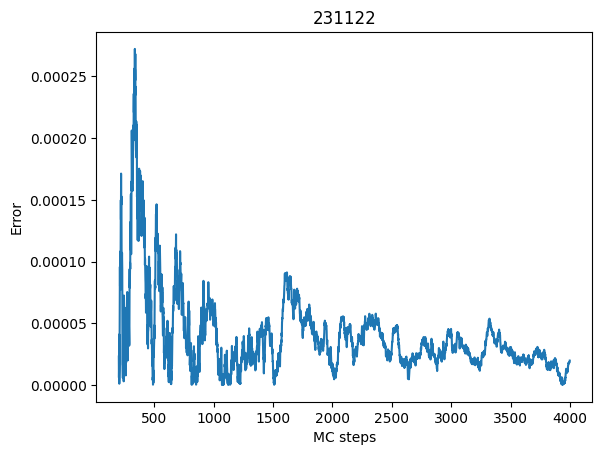

In [ ]:
#@title 2번: error 그리기
my.show_err(exact=0.5, start=200)

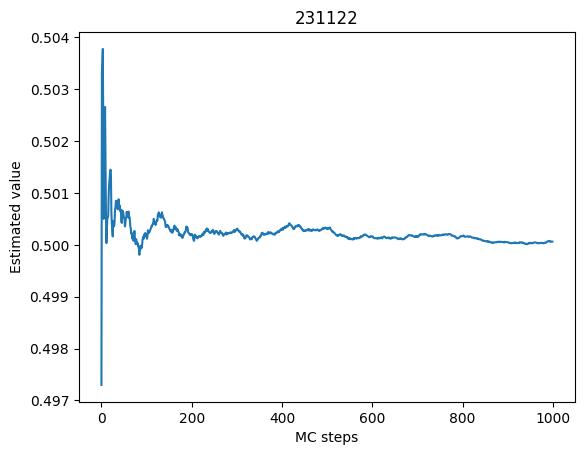

In [ ]:
#@title 3번: seed 값을 1이 아닌 10으로 바꾸고 위 과정을 반복해서 차이를 관찰하고 결과 설명하기
new_seed = MC_int(func, seed=10)
new_seed.MC(1000)
new_seed.show()

설명: MC steps이 증가할수록 추정치가 수렴한다. seed가 1일때와 10일때의 수렴하는 값이 서로 비슷해지는 것을 확인할 수 있다.

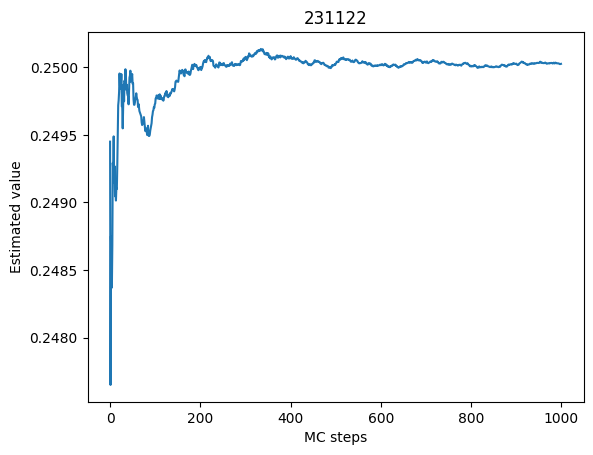

In [ ]:
#@title 4번: y=x가 아닌 다른 함수를 정의하여 적분해보기 (단, 이 코드에서 동작하기 위해서는 주어진 구간에서의 함수값이 f(a)보다 작거나 f(b)보다 크면 안됨.)
import numpy as np

def new_func(x):
    return (1/2)*x

new_func = MC_int(new_func, a=0, b=1)
new_func.MC(1000)
new_func.show()

설명: y=x 대신 y=(1/2)x로 적분을 해보았다. 구간은 동일하게 0부터 1까지로 설정했다. y=x인 경우에 수렴하는 값은 약 0.5였는데, y=(1/2)x인 경우에는 약 0.25로 수렴하는 것을 확인할 수 있다. 실제로도 동일 구간에서 y=x보다 y=(1/2)x 그래프에서 적분값이 절반이므로, 제대로 결과가 나오는 것을 확인할 수 있다.